In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df.describe()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,10.040326,0.333333,-73.976626,40.751443,-73.974501,40.751695,1.347167
std,7.500134,0.471406,0.031497,0.025821,0.032419,0.030279,0.759263
min,2.500000,0.000000,-74.465447,40.121653,-74.443323,40.164927,1.000000
25%,5.700000,0.000000,-73.992386,40.736594,-73.991478,40.735914,1.000000
50%,7.700000,0.000000,-73.982084,40.753661,-73.980411,40.754441,1.000000
75%,11.300000,1.000000,-73.968710,40.768020,-73.965500,40.768880,1.000000
max,49.900000,1.000000,-73.311845,40.981292,-73.496140,40.993498,5.000000


In [6]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    Latitudes (lat1, lat2) and longitudes (long1, long2) are stored in degrees in the DataFrame.
    """
    r = 6371  # average radius of Earth in kilometers. It will be used to convert the angular distance into physical distance (kilometers)

    # Convert angles from degrees to radians.
    # because trigonometric functions in Python work with angles measured in radians.
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])

    # The function calculates the difference between the latitudes (delta_phi) and the longitudes (delta_lambda), 
    # also converting these differences into radians.
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])

    # a is a temporary value calculated using the sine and cosine of the latitudes and longitudes.
    # c is the angular distance between the two points, calculated using the arctangent function (np.arctan2).
    # The actual distance d is computed by multiplying the angular distance c by the Earth's radius r, yielding the distance in kilometers.
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

### Feature engineering

In [7]:
df['dist_km'] = haversine_distance(df, 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude')

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [10]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [11]:
# Eastern Daylight Time (EDT) is UTC minus 4 hours (UTC-4)
# converts the pickup_datetime column in the DataFrame to Eastern Daylight Time (EDT) by subtracting 4 hours.
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522,2010-04-19 04:17:56+00:00
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370,2010-04-17 11:43:53+00:00
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373,2010-04-17 07:23:26+00:00
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661,2010-04-11 17:25:03+00:00
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764,2010-04-16 22:19:01+00:00


In [13]:
df['Hour'] = df['EDTdate'].dt.hour

In [14]:
df['MORorAFTorNIG'] = df['Hour'].apply(lambda x: 'mor' if x<12 else 'aft' if x< 18 else 'nig')

In [15]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [16]:
df['Weekday'] = df['EDTdate'].dt.strftime('%a')

In [17]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,MORorAFTorNIG,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,1.925522,2010-04-19 04:17:56+00:00,4,mor,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.765370,2010-04-17 11:43:53+00:00,11,mor,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.818373,2010-04-17 07:23:26+00:00,7,mor,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2.158661,2010-04-11 17:25:03+00:00,17,aft,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,9.457764,2010-04-16 22:19:01+00:00,22,nig,pm,Fri


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
 9   EDTdate            120000 non-null  datetime64[ns, UTC]
 10  Hour               120000 non-null  int32              
 11  MORorAFTorNIG      120000 non-null  object             
 12  AMorPM             120000 non-

In [19]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'MORorAFTorNIG',
       'AMorPM', 'Weekday'],
      dtype='object')

In [20]:
cat_cols = ['Hour', 'AMorPM', 'MORorAFTorNIG', 'Weekday']
num_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'dist_km']

In [21]:
y_col = ['fare_amount']

In [22]:
# .astype('category'): This converts the data type of the column to the Pandas category type. 
# The category data type is used to efficiently represent categorical variables, especially when they have a limited number of distinct values.

for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
MORorAFTorNIG                   category
AMorPM                          category
Weekday                         category
dtype: object

In [24]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [25]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [26]:
df['MORorAFTorNIG'].head()

0    mor
1    mor
2    mor
3    aft
4    nig
Name: MORorAFTorNIG, dtype: category
Categories (3, object): ['aft', 'mor', 'nig']

In [27]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [28]:
# The .cat.codes attribute provides the integer representation of each category, 
# which can be useful for machine learning models or other numerical processing.

df['MORorAFTorNIG'].cat.codes.values

array([1, 1, 1, ..., 0, 1, 0], dtype=int8)

In [29]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
moraftnig = df['MORorAFTorNIG'].cat.codes.values
weekday = df['Weekday'].cat.codes.values

In [30]:
cats = np.stack([hr, ampm, moraftnig, weekday], axis=1)

In [31]:
cats

array([[ 4,  0,  1,  1],
       [11,  0,  1,  2],
       [ 7,  0,  1,  2],
       ...,
       [14,  1,  0,  3],
       [ 4,  0,  1,  5],
       [12,  1,  0,  2]], dtype=int8)

### NOTE: This can be done in one line of code using a list comprehension:
cats = np.stack([df[col].cat.codes.values for col i ncal_coss], 1)

In [32]:
# convert np.array to tensors

cats = torch.tensor(cats, dtype=torch.int64)

In [33]:
nums = np.stack([df[col].values for col in num_cols], axis=1)

In [34]:
nums = torch.tensor(nums, dtype=torch.float)

In [35]:
nums

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   1.9255],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.7654],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.8184],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   2.8595],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.3207],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.3848]])

In [40]:
y = torch.tensor(df[y_col].values, dtype=torch.float)
y

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        ...,
        [12.5000],
        [ 4.9000],
        [ 5.3000]])

In [37]:
nums.shape

torch.Size([120000, 6])

In [38]:
cats.shape

torch.Size([120000, 4])

In [39]:
y.shape

torch.Size([120000, 1])

In [41]:
# setting up embedding size for the categorical columns
# how many unique values for each col

cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [42]:
cat_szs

[24, 2, 3, 7]

In [43]:
# embedding sizes calculation
# The embedding size is often set to be smaller than the number of unique categories to reduce the dimensionality and improve learning efficiency.

emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [44]:
emb_szs

[(24, 12), (2, 1), (3, 2), (7, 4)]

In [47]:
catz = cats[:4]
catz

tensor([[ 4,  0,  1,  1],
        [11,  0,  1,  2],
        [ 7,  0,  1,  2],
        [17,  1,  0,  3]])

In [49]:
# It is used to create a list of embedding layers for categorical variables
# nn.ModuleList is a container in PyTorch that holds a list of layers (or modules). In this case, it's being used to store a list of embedding layers.
# nn.ModuleList ensures that PyTorch can properly track all the layers and parameters within the model.
# nn.Embedding is a PyTorch layer used to learn embeddings for categorical variables. 
# It maps each unique category (represented as an integer index) to a vector of real numbers.
# ni: This is the number of unique categories for a specific categorical variable (i.e., the input dimension of the embedding).
# nf: This is the size of the embedding (i.e., the output dimension of the embedding), or the number of dimensions in the learned embedding vector.

selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [50]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(3, 2)
  (3): Embedding(7, 4)
)

In [51]:
# Forward method (cats)
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))

In [52]:
embeddingz

[tensor([[-1.5023,  0.3164, -1.0371,  0.9237, -0.2071, -0.0762, -0.7760, -1.9641,
           0.3051, -0.1024,  0.6124, -0.9098],
         [-1.2864, -1.1962, -1.1065,  1.5472,  0.5053, -1.8196,  0.0829, -0.1885,
           0.6633,  1.2312, -1.7205, -0.5765],
         [-2.1697,  1.2582, -1.2309, -1.9774,  0.7516, -0.8725,  0.5647, -0.3520,
          -0.9344, -0.0163, -0.2361, -0.0472],
         [-0.1519, -0.7225,  0.1052,  0.3405, -0.1131, -1.8084, -0.0413, -0.5950,
          -0.5618,  0.8037,  0.4189,  0.9038]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.6741],
         [ 1.6741],
         [ 1.6741],
         [-0.6992]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3797,  0.9286],
         [-0.3797,  0.9286],
         [-0.3797,  0.9286],
         [ 1.5514,  1.1511]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.6068, -1.7269, -0.8195,  0.4875],
         [ 0.4770,  0.8329, -0.9947,  0.6937],
         [ 0.4770,  0.8329, -0.9947,  0.6937],
         [ 0.6536, -1.3001,  0.8282,  0.7712]], gra

In [53]:
z = torch.cat(embeddingz,1)

In [54]:
z

tensor([[-1.5023,  0.3164, -1.0371,  0.9237, -0.2071, -0.0762, -0.7760, -1.9641,
          0.3051, -0.1024,  0.6124, -0.9098,  1.6741, -0.3797,  0.9286,  0.6068,
         -1.7269, -0.8195,  0.4875],
        [-1.2864, -1.1962, -1.1065,  1.5472,  0.5053, -1.8196,  0.0829, -0.1885,
          0.6633,  1.2312, -1.7205, -0.5765,  1.6741, -0.3797,  0.9286,  0.4770,
          0.8329, -0.9947,  0.6937],
        [-2.1697,  1.2582, -1.2309, -1.9774,  0.7516, -0.8725,  0.5647, -0.3520,
         -0.9344, -0.0163, -0.2361, -0.0472,  1.6741, -0.3797,  0.9286,  0.4770,
          0.8329, -0.9947,  0.6937],
        [-0.1519, -0.7225,  0.1052,  0.3405, -0.1131, -1.8084, -0.0413, -0.5950,
         -0.5618,  0.8037,  0.4189,  0.9038, -0.6992,  1.5514,  1.1511,  0.6536,
         -1.3001,  0.8282,  0.7712]], grad_fn=<CatBackward0>)

In [55]:
selfembdrop = nn.Dropout(0.4)

In [56]:
z = selfembdrop(z)

In [57]:
z

tensor([[-2.5039,  0.5273, -1.7286,  1.5395, -0.3452, -0.1270, -0.0000, -3.2736,
          0.0000, -0.1707,  1.0207, -0.0000,  2.7902, -0.6328,  1.5477,  1.0114,
         -2.8781, -0.0000,  0.8125],
        [-2.1440, -0.0000, -1.8441,  2.5786,  0.8422, -3.0326,  0.1382, -0.0000,
          0.0000,  2.0521, -0.0000, -0.0000,  2.7902, -0.6328,  1.5477,  0.0000,
          1.3882, -1.6578,  0.0000],
        [-0.0000,  2.0970, -0.0000, -3.2956,  0.0000, -1.4541,  0.9411, -0.0000,
         -1.5573, -0.0271, -0.0000, -0.0787,  2.7902, -0.6328,  0.0000,  0.0000,
          1.3882, -1.6578,  1.1562],
        [-0.2532, -0.0000,  0.1753,  0.5674, -0.0000, -0.0000, -0.0000, -0.9916,
         -0.0000,  0.0000,  0.0000,  1.5063, -0.0000,  0.0000,  1.9184,  0.0000,
         -0.0000,  1.3803,  1.2853]], grad_fn=<MulBackward0>)

In [64]:
class TabularModel(nn.Module):
    """
    It is a neural network model implemented in PyTorch.
    The TubularModel is designed to handle both categorical and numerical inputs 
    by embedding the categorical variables and applying batch normalization to the numerical features.
    
    """

    def __init__(self, emb_szs, n_num, out_sz, layers, p=0.5):
        """
        emb_szs: a list of tuples where each tuple represents the size and embedding dimension for categorical variables.
        The first element of each tuple is the number of unique categories, and the second is the embedding size.
        n_num: the number of numercial features.
        out_sz: the output size (number of classes in classification or 1 for regression).
        layers: a list defining the sizes of the hidden layers.
        p: Dropout probability, used to regularize the model and prevent overfitting.
        """
        # layers = [200, 100, 50]
        super().__init__()

        # a list of embedding layers for the categorical features.
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        # Dropout applied to the embeddings to prevent overfitting.
        self.emb_drop = nn.Dropout(p)
        # batch normalization for the numercial features so that they have a mean of 0 and a sd of 1.
        self.bn_num = nn.BatchNorm1d(n_num)

        # Sequential layer construction
        layerlist = []
        # n_emb is the all embedding dimensions
        n_emb = sum([nf for ni, nf in emb_szs])
        # The total input size is the sum of n_emb plus the number of numercial features (n_num)
        n_in = n_emb + n_num

        for i in layers:
            # each layer consists of a Linear layer (fully connected layer), a ReLU activaton function, Batch normalization, Dropout for regularization.
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))

        # a sequential stack of fully connected layers that form the main part of the neural network.
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_num):
        """
        The forward pass combines the processed categorical and numerical inputs, 
        passes them through a series of fully connected layers, and returns the final output.
        x_cat: a tensor of categorical inputs, where each column represents one categorical variable.
        x_num: a tensor of numberical inputs.
        """
        embeddings = []

        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, 1) # The embedding vectors are concatenated along the second dimension to form a single tensor x.
        x = self.emb_drop(x) # Dropout is applied to the concatenated embedding tensor.

        x_num = self.bn_num(x_num) # The numerical inputs are batch normalized.
        x = torch.cat([x, x_num], 1) #The embeddings and the numerical inputs are concatenated to form the complete input to the fully connected layers.
        x = self.layers(x) # the concatenated input is passed through the fully connected layers.
        return x  

In [65]:
torch.manual_seed(33)
model = TabularModel(emb_szs, nums.shape[1], 1, [200, 100], p=0.4)

In [66]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(3, 2)
    (3): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=25, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [68]:
criterion = nn.MSELoss()  # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
batch_size = 30000
test_size = int(batch_size*0.2)

In [70]:
# Data shuffled already
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
num_train = nums[:batch_size-test_size]
num_test = nums[batch_size-test_size:batch_size]

In [71]:
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [72]:
len(cat_train)

24000

In [73]:
len(num_train)

24000

In [74]:
len(cat_test)

6000

In [75]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1

    y_pred = model(cat_train, num_train)
    loss = torch.sqrt(criterion(y_pred, y_train))  # RMSE
    losses.append(loss)

    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f'Training took {duration/60} minutes')

epoch: 1 loss is 12.378658294677734
epoch: 11 loss is 11.476458549499512
epoch: 21 loss is 10.969151496887207
epoch: 31 loss is 10.654123306274414
epoch: 41 loss is 10.429951667785645
epoch: 51 loss is 10.245381355285645
epoch: 61 loss is 10.063552856445312
epoch: 71 loss is 9.890768051147461
epoch: 81 loss is 9.65821361541748
epoch: 91 loss is 9.434355735778809
epoch: 101 loss is 9.17088794708252
epoch: 111 loss is 8.879568099975586
epoch: 121 loss is 8.545781135559082
epoch: 131 loss is 8.191457748413086
epoch: 141 loss is 7.779458045959473
epoch: 151 loss is 7.337566375732422
epoch: 161 loss is 6.858595371246338
epoch: 171 loss is 6.375104904174805
epoch: 181 loss is 5.853915214538574
epoch: 191 loss is 5.361824035644531
epoch: 201 loss is 4.924312114715576
epoch: 211 loss is 4.527021884918213
epoch: 221 loss is 4.236721515655518
epoch: 231 loss is 4.0514631271362305
epoch: 241 loss is 3.904599189758301
epoch: 251 loss is 3.785752773284912
epoch: 261 loss is 3.7713465690612793
epoch

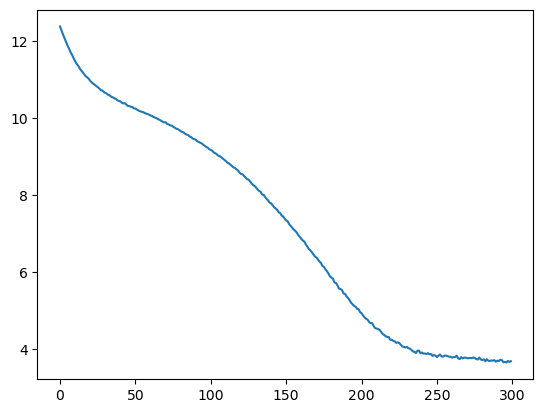

In [77]:
# Convert list of tensors to a list of NumPy arrays
losses = [loss.detach().cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in losses]
plt.plot(range(epochs), losses)

In [78]:
with torch.no_grad():

    y_val = model(cat_test, num_test)

    loss = torch.sqrt(criterion(y_val, y_test))

In [79]:
loss

tensor(3.7060)

In [81]:
for i in range(10):

    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) Predicted: {y_val[i].item():8.2f} True: {y_test[i].item():8.2f} Diff: {diff:8.2f}')

0.) Predicted:     5.26 True:     4.90 Diff:     0.36
1.) Predicted:     9.44 True:     8.50 Diff:     0.94
2.) Predicted:     6.91 True:     4.90 Diff:     2.01
3.) Predicted:    16.17 True:    14.90 Diff:     1.27
4.) Predicted:     7.50 True:     9.70 Diff:     2.20
5.) Predicted:    28.55 True:    30.27 Diff:     1.72
6.) Predicted:     6.95 True:     5.30 Diff:     1.65
7.) Predicted:     7.19 True:     5.30 Diff:     1.89
8.) Predicted:     5.33 True:     6.10 Diff:     0.77
9.) Predicted:     6.49 True:     6.10 Diff:     0.39


In [82]:
torch.save(model.state_dict(), 'Taximodel.pt')